In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('twitter_training.csv', header=None)

# Rename columns
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

# Drop rows with missing 'Text' values
df = df.dropna(subset=['Text'])

# Ensure 'Text' is of type string
df['Text'] = df['Text'].astype(str)

# Display the first few rows of the dataset
print(df.head())


     ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


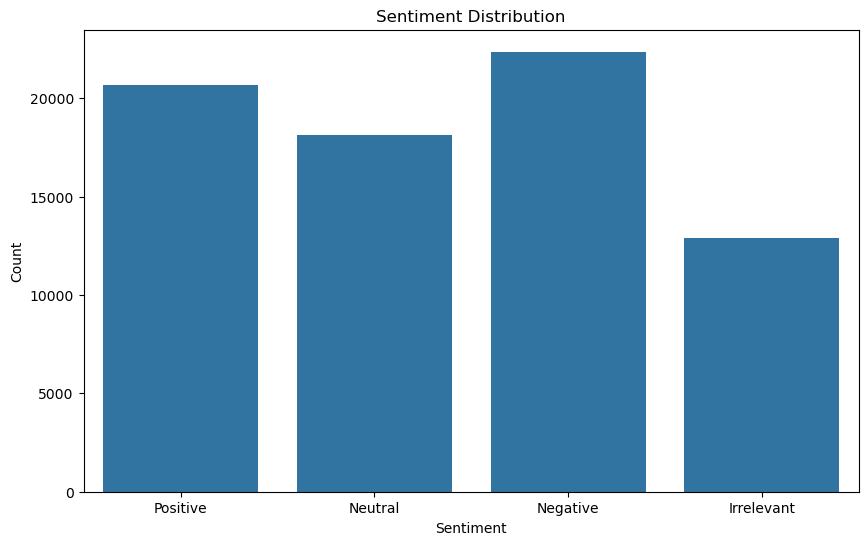

In [2]:
# Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


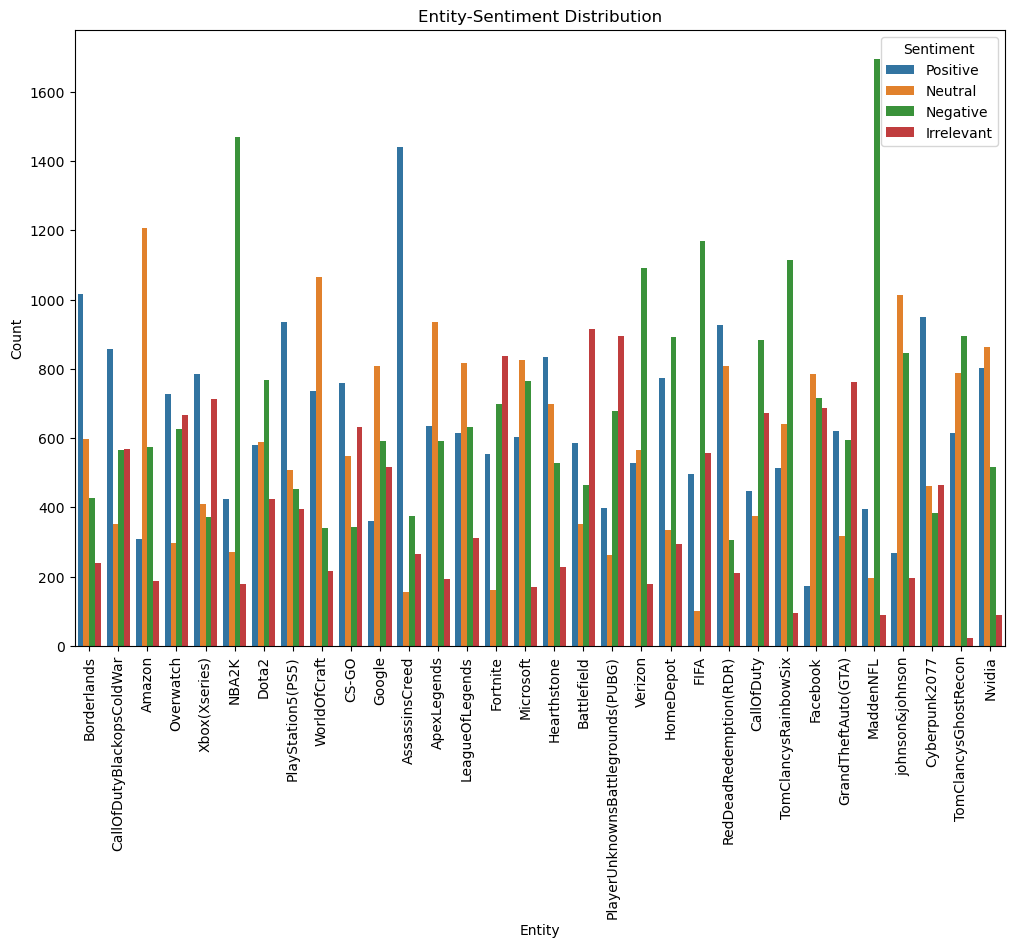

In [3]:

# Entity-Sentiment Distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='Entity', hue='Sentiment', data=df)
plt.title('Entity-Sentiment Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()


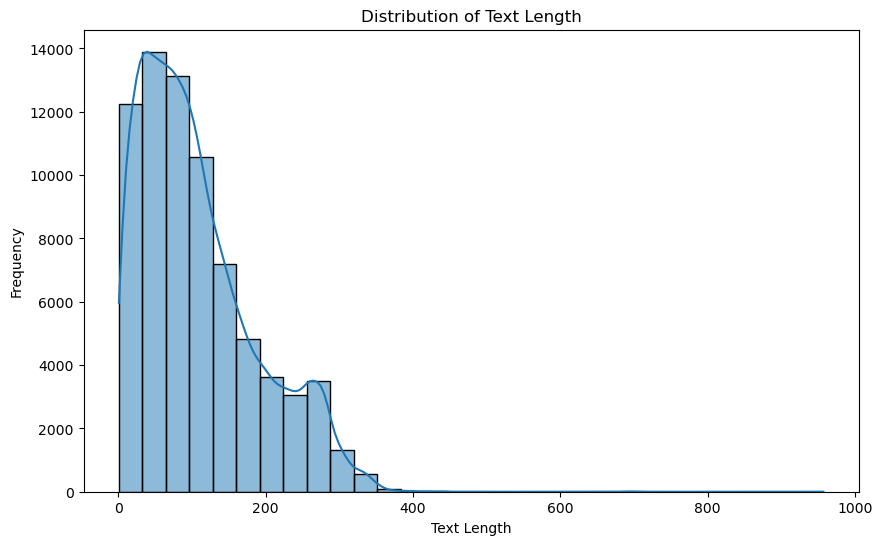

In [4]:

# Text length distribution
df['Text Length'] = df['Text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['Text Length'], bins=30, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

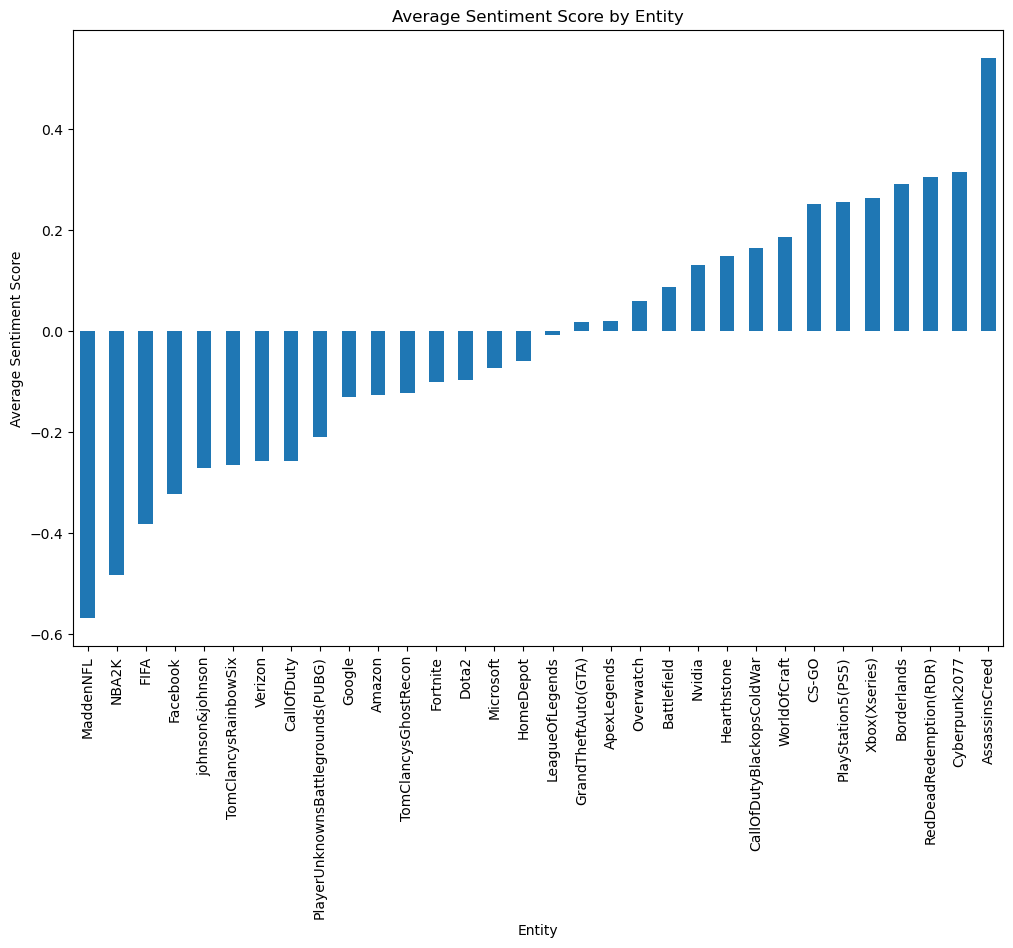

In [5]:
# 3. Average Sentiment Score by Entity
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['Sentiment Score'] = df['Sentiment'].map(sentiment_mapping)

avg_sentiment_by_entity = df.groupby('Entity')['Sentiment Score'].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_sentiment_by_entity.plot(kind='bar')
plt.title('Average Sentiment Score by Entity')
plt.xlabel('Entity')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.show()

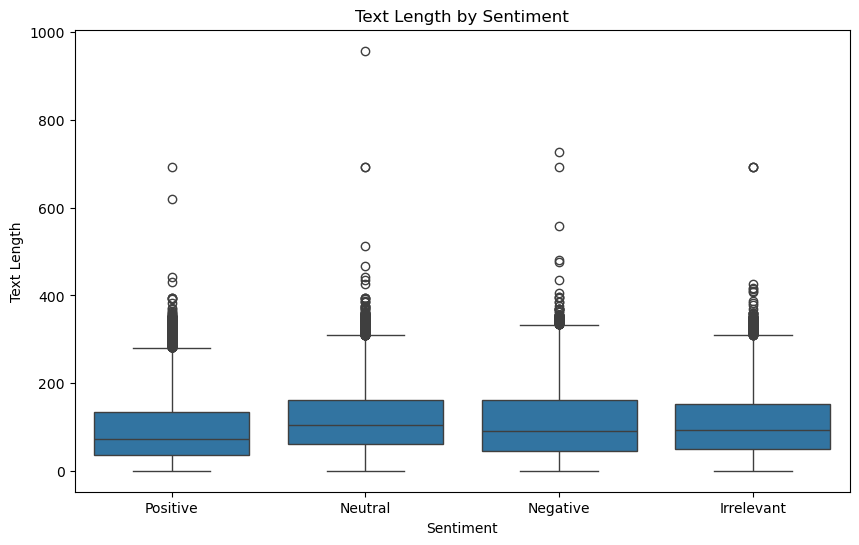

In [6]:
# 4. Correlation Analysis between Text Length and Sentiment
df['Text Length'] = df['Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Text Length', data=df)
plt.title('Text Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

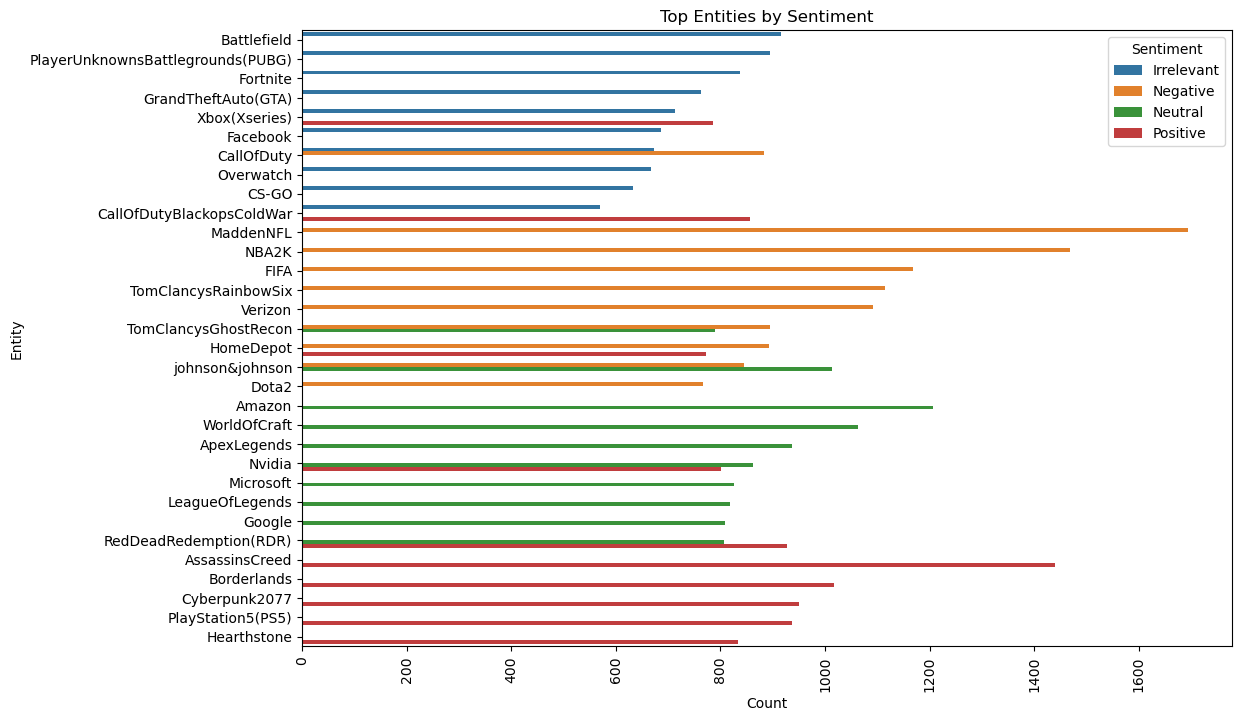

In [7]:

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk import ngrams
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



# Helper function to plot top N n-grams
def plot_top_ngrams(corpus, n=None, ngram_range=(1, 1), title='Top N-grams'):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    common_words = words_freq[:n]
    df_ngrams = pd.DataFrame(common_words, columns=['Ngram', 'Frequency'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Ngram', data=df_ngrams)
    plt.title(title)
    plt.show()



#  Top Entities by Sentiment
top_entities = df.groupby('Sentiment')['Entity'].value_counts().groupby(level=0).nlargest(10).reset_index(level=0, drop=True)
top_entities_df = top_entities.reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Entity', hue='Sentiment', data=top_entities_df)
plt.title('Top Entities by Sentiment')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()




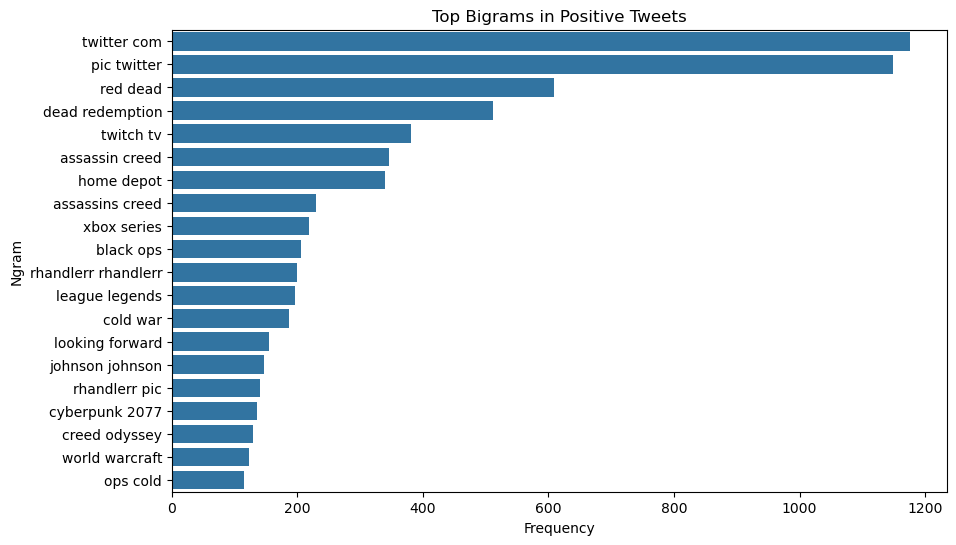

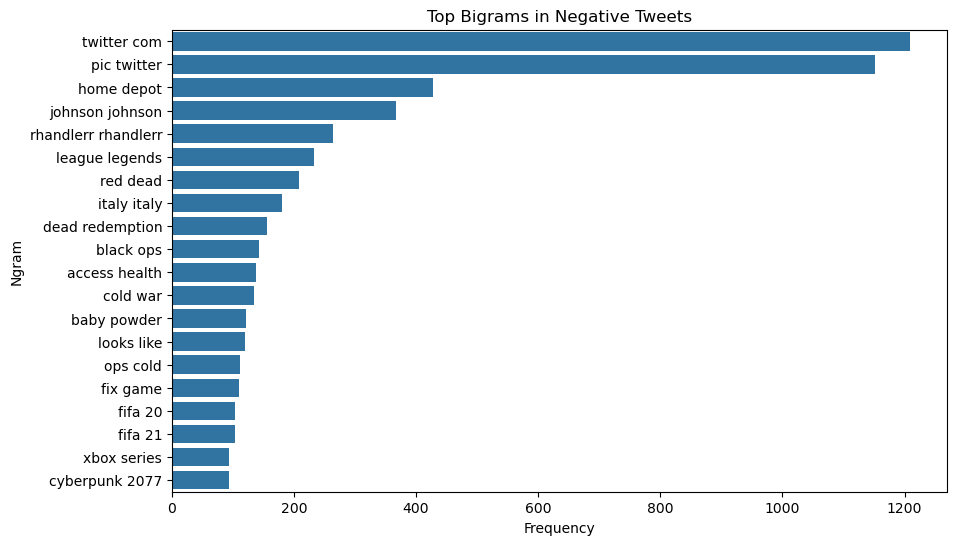

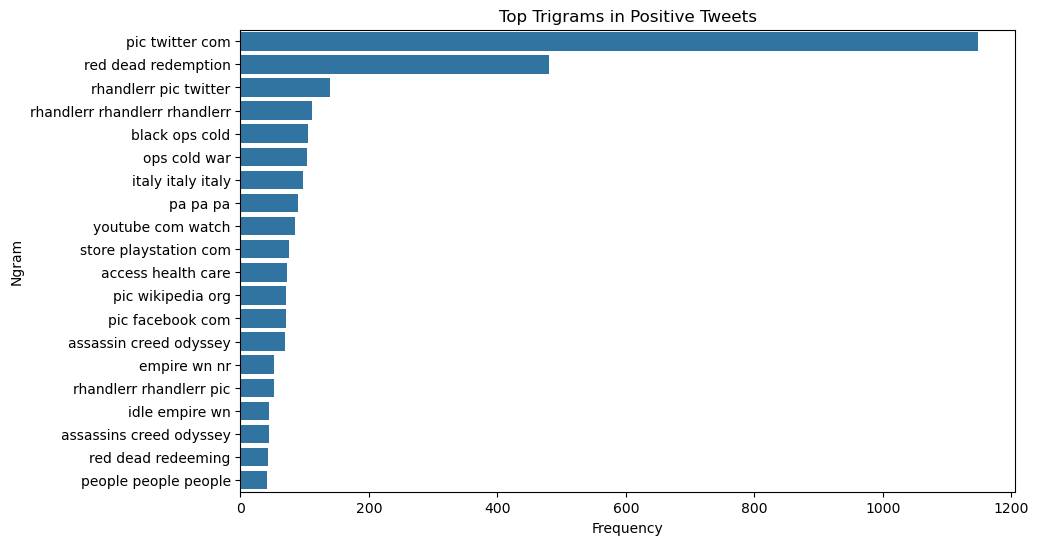

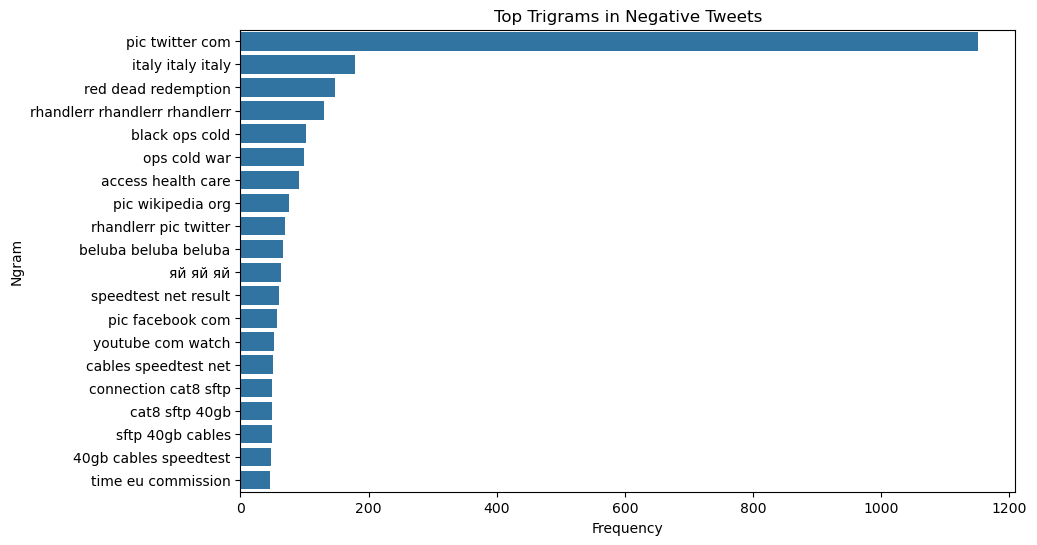

In [8]:
#  Bigram and Trigram Analysis for Positive and Negative Sentiments
positive_tweets = df[df['Sentiment'] == 'Positive']['Text']
negative_tweets = df[df['Sentiment'] == 'Negative']['Text']

plot_top_ngrams(positive_tweets, n=20, ngram_range=(2, 2), title='Top Bigrams in Positive Tweets')
plot_top_ngrams(negative_tweets, n=20, ngram_range=(2, 2), title='Top Bigrams in Negative Tweets')

plot_top_ngrams(positive_tweets, n=20, ngram_range=(3, 3), title='Top Trigrams in Positive Tweets')
plot_top_ngrams(negative_tweets, n=20, ngram_range=(3, 3), title='Top Trigrams in Negative Tweets')



In [9]:
# Topic Modeling with LDA (on all tweets)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['Text'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Display the top words for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print("\n")

Topic #0:
game like just shit fuck fucking don really play know


Topic #1:
com pic twitter johnson facebook rhandlerr player google 2020 ban


Topic #2:
verizon home just people pubg amazon depot nvidia free money


Topic #3:
good game tv twitch great just thank happy amazing love


Topic #4:
game xbox dead red time play world games series redemption


